## Introduction

In [2]:
library(tidyverse)
library(broom)




── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Preliminary Results
In this section, we will demonstrate that we can read the data from the web and wrangle it into a tidy format. We will also address our primary question with plots and tables.
#### Reading the Data

In [3]:
steam_games <- read_csv('https://raw.githubusercontent.com/DanielZCode/STAT-301-Project/main/games-features-edit.csv') # read_csv on url which responds with the data
head(steam_games) # preview of the data 
nrow(steam_games) # 12624 data points (games)
colnames(steam_games) #variable names
length(colnames(steam_games)) #number of variables == 19


Rows: 12624 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ResponseName, ReleaseDate
dbl  (3): Metacritic, RecommendationCount, PriceInitial
lgl (14): IsFree, GenreIsNonGame, GenreIsIndie, GenreIsAction, GenreIsAdvent...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
Counter-Strike,Nov 1 2000,88,68991,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Team Fortress Classic,Apr 1 1999,0,2439,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Day of Defeat,May 1 2003,79,2319,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Deathmatch Classic,Jun 1 2001,0,888,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Half-Life: Opposing Force,Nov 1 1999,0,2934,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Ricochet,Nov 1 2000,0,1965,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99


[1] 12624

[1] "ResponseName"                "ReleaseDate"                
 [3] "Metacritic"                  "RecommendationCount"        
 [5] "IsFree"                      "GenreIsNonGame"             
 [7] "GenreIsIndie"                "GenreIsAction"              
 [9] "GenreIsAdventure"            "GenreIsCasual"              
[11] "GenreIsStrategy"             "GenreIsRPG"                 
[13] "GenreIsSimulation"           "GenreIsEarlyAccess"         
[15] "GenreIsFreeToPlay"           "GenreIsSports"              
[17] "GenreIsRacing"               "GenreIsMassivelyMultiplayer"
[19] "PriceInitial"

[1] 19

### Wrangling 
In order to correctly use the `ReleaseDate` variable, we will need to convert it from its current character-based format to a numerical value. Although it would be convenient to convert this variable year that the game was released, that would not be a true continuous variable since years are mostly discrete (especially in the case of Steam games, where the data available is fairly recent). Hence, we will need to convert `ReleaseDate` to a continuous variable representing the number of days passed since January 1st, 1970. This is a common representation of time in computers. 

In addition, we will filter the data for missing values, and in particular check that a game's `Metacritic` score is not 0, because that indicates a lack of reviews and an unplayed game. We will also filter only for games that were released after 1970.


In [4]:


steam_games$ReleaseDate <- steam_games$ReleaseDate %>% as.Date(format="%b%d%Y") %>%  as.numeric() #convert dates to days since 1970 (default internal representation) 


steam_games <- steam_games %>% drop_na() %>% filter(Metacritic > 0, ReleaseDate > 0) # filter for more than 0 days passed since 1970, metacritic score > 0


head(steam_games)
nrow(steam_games)


ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
Counter-Strike,11262,88,68991,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Day of Defeat,12173,79,2319,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Half-Life,10538,96,12486,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Counter-Strike: Condition Zero,12478,65,7067,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Counter-Strike: Condition Zero,12478,65,7067,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Half-Life: Blue Shift,11474,71,2219,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99


[1] 2241

After wrangling the data in this way, we are left with 2241 observations, down from the original 12624 observations. However, this is still too large. In particular, the plots are slow to run with this many data points, and do not render correctly in the final .ipynb or .html file. Therefore, we will need to artifically take a lower sample of a dataset, using `sample_n`. We've chosen to work with a sample of 1000. 

In [5]:
set.seed(3012)
steam_games <- steam_games %>% sample_n(1000)

### Exploratory Analysis
In this section we will explore some estimates variables. In addition we will plot visualizations of our reponse variable, `Metacritic`, and its relation to other variables.

First, let us see the distribution of `Metacritic` scores.

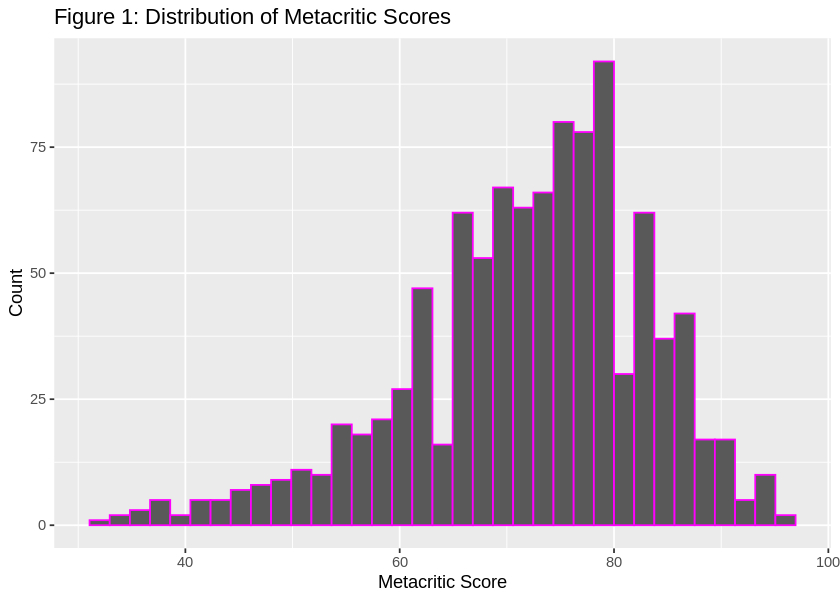

In [6]:
options(repr.plot.width = 7, repr.plot.height = 5)

steam_games_metacritic_dist <- steam_games %>% ggplot() +
    geom_histogram(aes(x = Metacritic), bins = 35, color = '#FF00FF') +
    ggtitle('Figure 1: Distribution of Metacritic Scores') +
    labs(x = 'Metacritic Score', y = 'Count')

steam_games_metacritic_dist
    

Next, let us plot the relationship of Metacritic Score with the other continous variables.

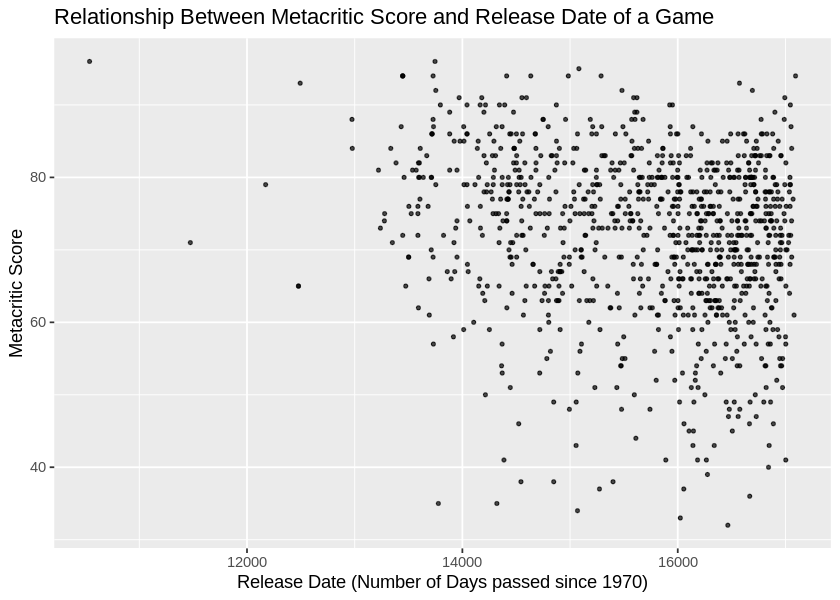

In [7]:
steam_games_metacritic_releasedate_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = ReleaseDate, y = Metacritic), size = 0.8, alpha = 0.7) +
    ggtitle('Relationship Between Metacritic Score and Release Date of a Game') +
    labs(y = 'Metacritic Score', x = 'Release Date (Number of Days passed since 1970)')
steam_games_metacritic_releasedate_plot

**Figure 1. Metacritic Score vs. Release Date**

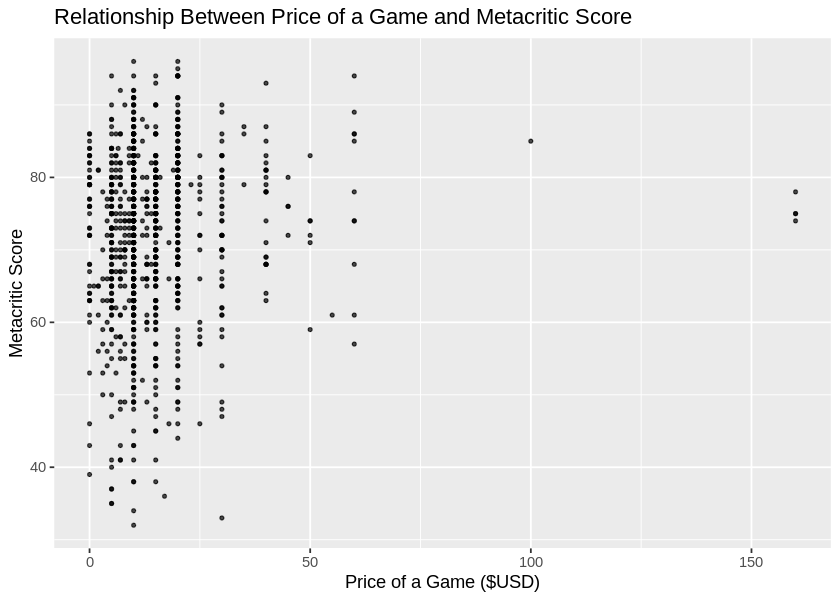

In [8]:
steam_games_metacritic_price_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = PriceInitial, y = Metacritic),  size = 0.8, alpha = 0.7) +
    ggtitle('Relationship Between Price of a Game and Metacritic Score') +
    labs(y = 'Metacritic Score', x = 'Price of a Game ($USD)')
steam_games_metacritic_price_plot

**Figure 2. Metacritic Score vs Price**

Below we will compute some estimates of the data.


In [9]:
steam_games_summarized <- steam_games %>% summarize(ReleaseDate_mean = mean(ReleaseDate), 
                                                    ReleaseDate_mean_Date = format(as.Date(ReleaseDate_mean, origin ='1970-01-01'), '%B %d, %Y'),
                                                    Metacritic_mean = mean(Metacritic), 
                                                    RecommendationCount_mean = mean(RecommendationCount),
                                                    PriceInitial_mean = mean(PriceInitial))
steam_games_summarized

ReleaseDate_mean,ReleaseDate_mean_Date,Metacritic_mean,RecommendationCount_mean,PriceInitial_mean
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
15666.45,"November 22, 2012",72.068,4844.749,14.82081


**Figure 3. Averages of different variables**

As we can see, the average Metacritic score of a Steam game is approximately **72**, and the average release date was in **November, 2012**. In addition, Steam games have received **4637** recommendations on average, and have a mean price of **$14.86**.